In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
encodings=['utf-8','latin1','ISO-8859-1','cp152']

file_path='spam.csv'
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"File successfully read with encoding:{encoding}")
        break
    except UnicodeDecodeError:
        print("Failed to read with enoding :{encoding}")
        continue

if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed.unable to read the csv file.")


Failed to read with enoding :{encoding}
File successfully read with encoding:latin1
CSV file has been successfully loaded.


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
397,ham,You are always putting your business out there...,NaN,NaN,NaN
4042,ham,I am literally in bed and have been up for lik...,NaN,NaN,NaN
3956,ham,Where is that one day training:-),NaN,NaN,NaN
13,ham,I've been searching for the right words to tha...,NaN,NaN,NaN
4674,spam,"Hi babe its Chloe, how r u? I was smashed on s...",NaN,NaN,NaN


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2008,ham,See the forwarding message for proof,NaN,NaN,NaN
34,spam,Thanks for your subscription to Ringtone UK yo...,NaN,NaN,NaN
5394,ham,I dont know exactly could you ask chechi.,NaN,NaN,NaN
2024,ham,U having lunch alone? I now so bored...,NaN,NaN,NaN
4710,ham,Huh so slow i tot u reach long ago liao... U 2...,NaN,NaN,NaN


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 5)

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [16]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

<ipython-input-16-3e41d332c0eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)


In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


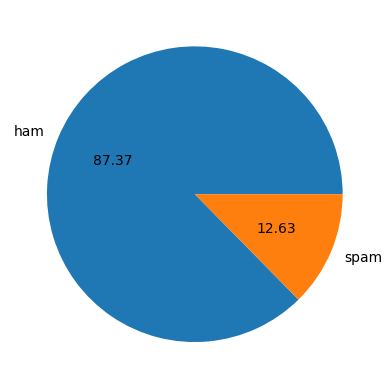

In [18]:
import matplotlib.pyplot as  plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['num_characters']=df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df[['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,5169.000000,5169.000000
mean,78.977945,1.965564
std,58.236293,1.448541
min,2.000000,1.000000
25%,36.000000,1.000000
50%,60.000000,1.000000
75%,117.000000,2.000000
max,910.000000,38.000000


In [25]:
df[df['target']==0][['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,4516.000000,4516.000000
mean,70.459256,1.820195
std,56.358207,1.383657
min,2.000000,1.000000
25%,34.000000,1.000000
50%,52.000000,1.000000
75%,90.000000,2.000000
max,910.000000,38.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

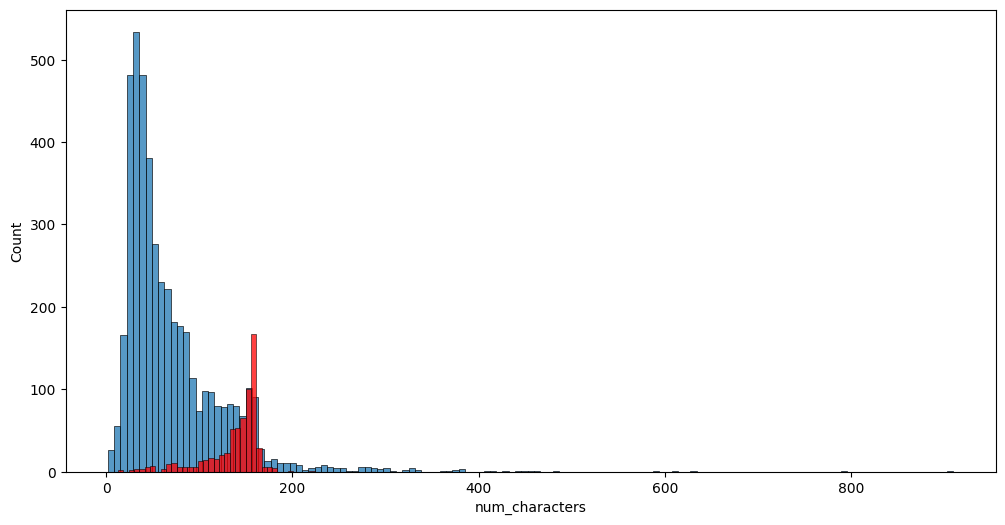

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

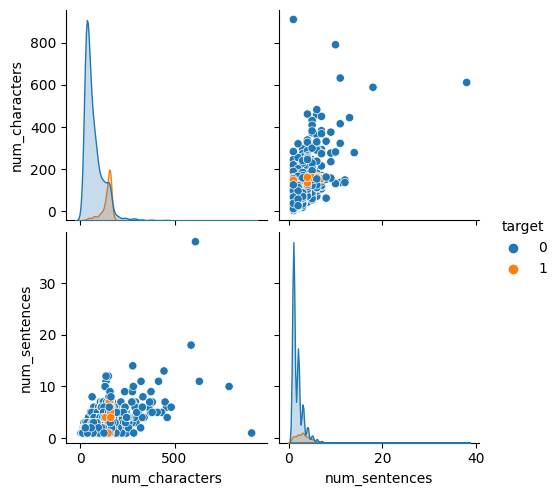

In [28]:
sns.pairplot(df,hue='target')

<ipython-input-29-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

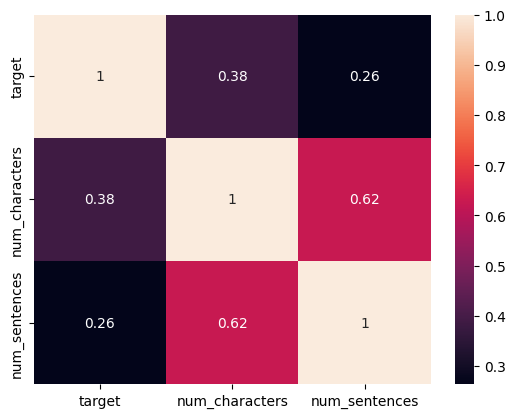

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

ps=PorterStemmer()

def transform_text(text):
  text= text.lower()
  text= nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text= y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

transformed_text= transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight,k? I've cried enough today")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [32]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('lovingg')

'lovingg'

In [33]:
df['transformed_text']= df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,nah think goe usf live around though


In [35]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

ps=PorterStemmer()

def transform_text(text):
  text= text.lower()
  text= nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text= y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

transformed_text= transform_text("'Hey wassup all good?")
print(transformed_text)

wassup good


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('walk')

'walk'

In [37]:
df['transformed_text']=df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc= WordCloud(width=500,min_font_size=10,background_color='white')

In [40]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


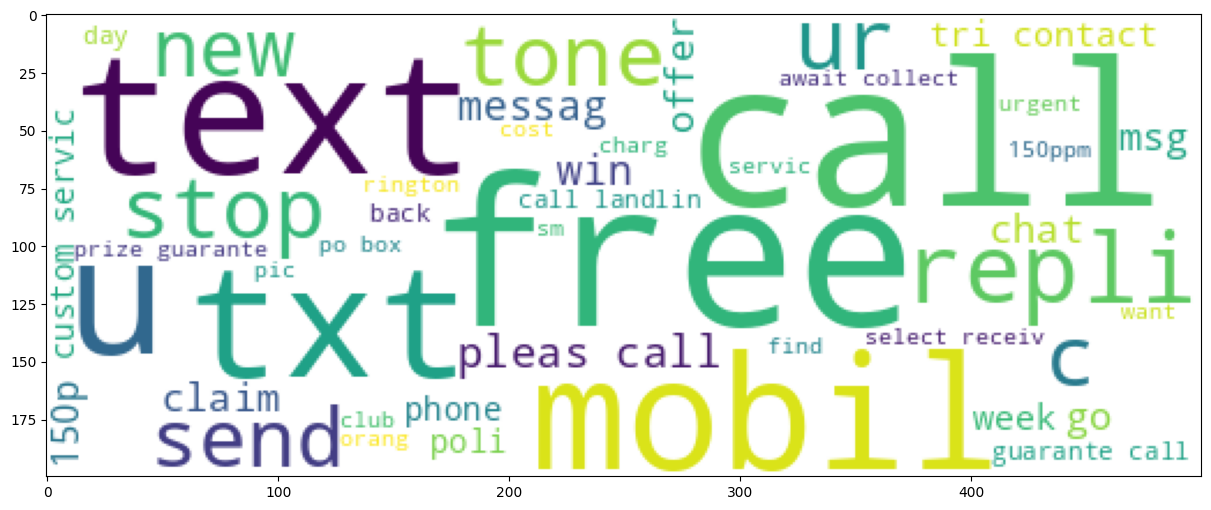

In [41]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [42]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


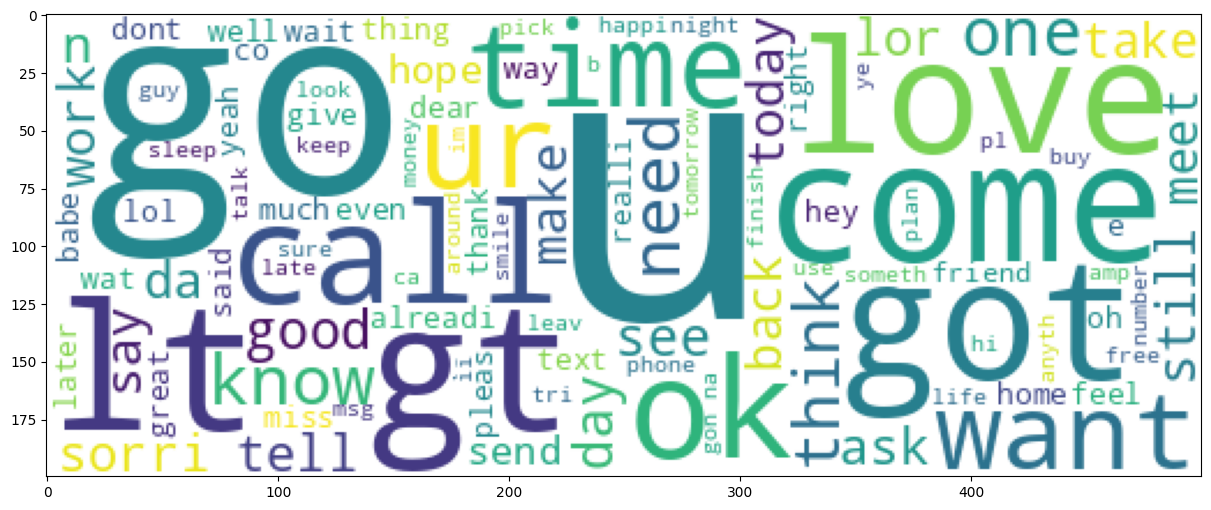

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [44]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [45]:
len(spam_corpus)

9939

In [46]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [47]:
len(ham_corpus)

35404

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [49]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
x.shape

(5169, 3000)

In [51]:
y=df['target'].values

In [52]:
from sklearn.model_selection import  train_test_split


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [56]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [57]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [58]:
bnb.fit(x_train,y_train)
y_pred3= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [59]:
import xgboost

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc= SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear',penalty='l1')
rfc= RandomForestClassifier(n_estimators=50,random_state=2)
abc= AdaBoostClassifier(n_estimators=50,random_state=2)
bc= BaggingClassifier(n_estimators=50,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb= XGBClassifier(n_estimators=50,random_state=2)

In [62]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost': abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'Xgb':xgb


}

In [63]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred= clf.predict(x_test)
  accuracy= accuracy_score(y_test,y_pred)
  precission= precision_score(y_test,y_pred)

  return accuracy,precission

In [64]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [65]:
from multiprocessing.process import current_process
accuracy_scores=[]
precission_scores=[]

for name,clf in clfs.items():

  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("For",name)
  print("Accuracy-",current_accuracy)
  print("Precision-",current_precision)

  accuracy_scores.append(current_accuracy)
  precission_scores.append(current_precision)

For SVC
Accuracy- 0.9758220502901354
Precision- 0.9747899159663865
For KN
Accuracy- 0.9052224371373307
Precision- 1.0
For NB
Accuracy- 0.9709864603481625
Precision- 1.0
For DT
Accuracy- 0.9323017408123792
Precision- 0.8333333333333334
For LR
Accuracy- 0.9584139264990329
Precision- 0.9702970297029703
For RF
Accuracy- 0.9758220502901354
Precision- 0.9829059829059829
For AdaBoost
Accuracy- 0.960348162475822
Precision- 0.9292035398230089
For BgC
Accuracy- 0.9584139264990329
Precision- 0.8682170542635659
For ETC
Accuracy- 0.9748549323017408
Precision- 0.9745762711864406
For GBDT
Accuracy- 0.9468085106382979
Precision- 0.9191919191919192
For Xgb
Accuracy- 0.9671179883945842
Precision- 0.9262295081967213


In [66]:
performance_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precission_scores}).sort_values('Precision',ascending=False)

In [67]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,Xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [68]:
performance_df1= pd.melt(performance_df,id_vars='Algorithm')

In [69]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,Xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


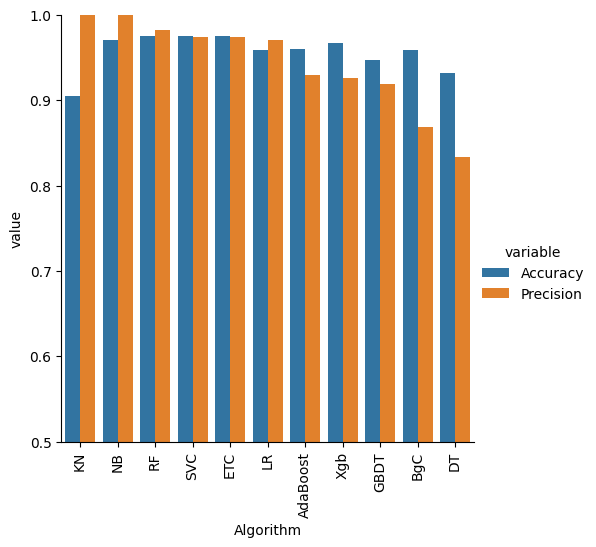

In [70]:
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [71]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
ect=ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [72]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [73]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [74]:
y_pred= voting.predict(x_test)
print("Accuray",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuray 0.9825918762088974
Precision 0.9918032786885246


In [75]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier

In [77]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [78]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [79]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

x_train=["Sample text 1","Sample text 2","Sample text 3"]
y_train=[0,1,0]

tfidf=TfidfVectorizer(lowercase=True, stop_words='english')
x_train_tfidf=tfidf.fit_transform(x_train)

mnb=MultinomialNB()
mnb.fit(x_train_tfidf,y_train)

with open('vectorizer.pkl','wb') as vectorizer_file:
  pickle.dump(tfidf,vectorizer_file)

with open('model.pkl','wb') as model_file:
  pickle.dump(mnb,model_file)